# Ingeniería de features, Modelos avanzados e Interpretación de modelos
#### Aplica ingeniería de Features y Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?


 En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos? 

## PARTE A - Transformación de Datos

#### Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

* Detección y eliminación de Outliers
* Encoding
* Imputación de valores faltantes
* Escalado de datos
* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

#### Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

In [1]:
# Importamos las librerias para comenzar con esta primera parte del proyecto 2. Esta sera en primer lugar, dejar el dataset
# tal cual quedo en el primer proyecto, y por otro lado se hará una pequeña exploracion de datos, esto mas que nada a modo de
# revisar por cada cambio que le hagamos como se van comportando nuestros datos.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df_properati = pd.DataFrame(pd.read_csv("DS_Proyecto_01_Datos_Properati.csv "))
df_properati

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [3]:
filter_1 = df_properati.copy()
filter_1 = filter_1[(filter_1["l2"]=="Capital Federal")]
filter_1.head()

filter_2 = filter_1.copy()
filter_2 = filter_1[(filter_1['property_type'] == 'Departamento') | (filter_1['property_type'] == 'PH') 
            | (filter_1['property_type'] == 'Casa')] 
df = filter_2.drop(["lat", "lon","start_date","end_date","created_on", "title", "description"], axis = 1)
df

,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Departamento,Venta
1,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta
2,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta
3,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta
5,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...
146554,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,PH,Venta
146555,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH,Venta
146556,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,PH,Venta
146557,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Departamento,Venta


In [4]:
filter_statitics = filter_2[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price","property_type"]]
statitics = (filter_statitics["surface_total"] > 15) & (filter_statitics["surface_total"] < 1000) & filter_statitics["price"] < 4000000
df_final = pd.DataFrame(filter_statitics[statitics].dropna())
df_final = df_final[df_final.price <= 4000000]
df_final = df_final[df_final.surface_total >= 15]
df_final = df_final[df_final.surface_total <= 1000]

# El nuevo dataframe se denominara "filter_total" el cual es el mismo que con el que finalizamos el primer proyecto.

df_final

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [5]:
# Saco una muestra para analizar la correlacion antes de comenzar con la limpieza de datos.
m = df_final.sample(n=1000,random_state=1,replace=True)

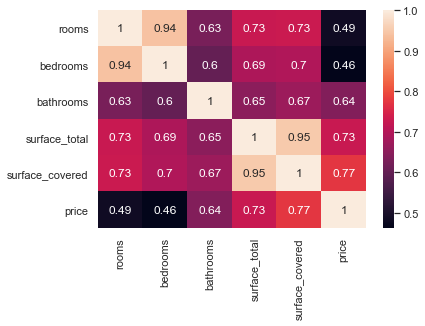

In [6]:
# Correlacion General del Dataframe.
sns.heatmap(m.corr(method = 'pearson'), annot = True)
plt.show()

<AxesSubplot:xlabel='property_type', ylabel='count'>

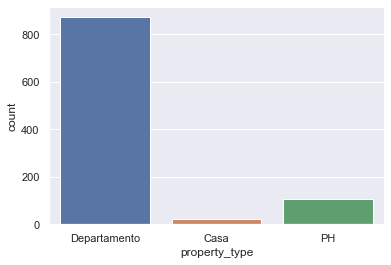

In [7]:
# vemos la distribucion de propiedades antes de la limpieza.
sns.countplot(x="property_type", data=m)

In [8]:
# Vemos los valores estadisticos mas importantes para tener una idea de como esta compuesto el dataset
df_final.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


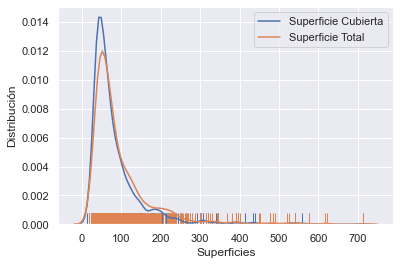

In [9]:
# notamos donde se concentra la distribución de datos:
sns.distplot(m.surface_covered, hist = False, rug = True, label= "Superficie Cubierta")
sns.distplot(m.surface_total, hist = False, rug = True, label= "Superficie Total")
plt.xlabel("Superficies")
plt.ylabel("Distribución")
plt.legend()
plt.show()

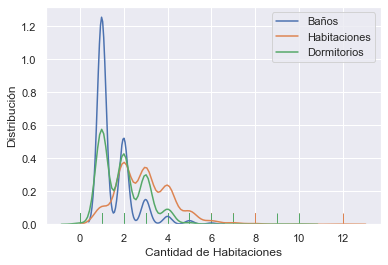

In [10]:
sns.distplot(m.bathrooms, hist = False, rug = True, label= "Baños")
sns.distplot(m.rooms, hist = False, rug = True, label= "Habitaciones")
sns.distplot(m.bedrooms, hist = False, rug = True, label= "Dormitorios")
plt.xlabel("Cantidad de Habitaciones")
plt.ylabel("Distribución")
plt.legend()
plt.show()

<AxesSubplot:xlabel='price'>

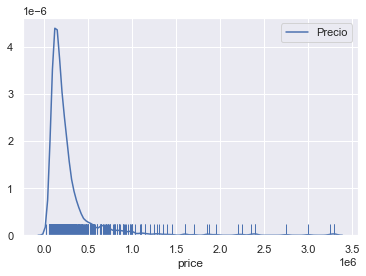

In [11]:
sns.distplot(m.price, hist = False, rug = True, label= "Precio")

In [12]:
# La vista de estas distribuciones nos da una pauta de donde estan concentrado el mayor volumen de datos por cada Feature.
# TAmbien notamos la presencia de Outliers ya que las colas de las distribuciones de los lados derechos no presetan volumen
# alguno de datos sino que son muy pocos. Por lo tanto esta primera parte sera la deteccion y eliminacion de los mismos.

In [13]:
# Si bien se utiliza la regla de los 3 sigmas para limpiar los outliers, se utilizara hasta dos sigmas atendiendo a que 
# así estamos seguros de que el data set contiene el 95% de la distribucion de datos. 
media = df_final.mean()
desvio = df_final.std()
ds_max = media +2*desvio
print(df_final.min())
print(ds_max)

rooms                 1
bedrooms              0
bathrooms             1
surface_total        15
surface_covered       1
price              6000
property_type      Casa
dtype: object
rooms                   5.626857
bedrooms                4.101382
bathrooms               3.259164
surface_total         249.868934
surface_covered       397.194773
price              861672.238856
dtype: float64


In [14]:
# Ahora partimos del hecho de que para valores minimos, estos no interfieren en el analisis ya que no representan valores
# muy atipicos en las distribuciones como vimos mas arriba donde estaba el mayor volumen de datos. Pero por otro lado, lo que
# sí interfiere en el analisis son los outliers con valores muy grandes, por lo que se quitará una "cola" de la distrubucion
# que no nos sirve para el analisis y solo interfiere en los modelos. 
# Atendiendo a los valores de la media más 2 sigmas a la derecha, dado esos valores, se redondea para arriba para que 
# haya mas margen de datos. Esto no tiene porque afectar el posterior analisis y corrobaramos que la distrubucion tenga
# aproximadamente el 95% de los datos.

In [15]:
df_cut = df_final[df_final.rooms <= 6]
df_cut = df_final[df_final.bedrooms <= 5]
df_cut = df_final[df_final.bathrooms <= 4]
df_cut = df_final[df_final.surface_total <= 250]
df_cut = df_final[df_final.surface_covered <= 400]
df_cut = df_final[df_final.price <= 870000]

df_sigma = pd.DataFrame(df_cut)

df_sigma

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH


<AxesSubplot:xlabel='property_type', ylabel='count'>

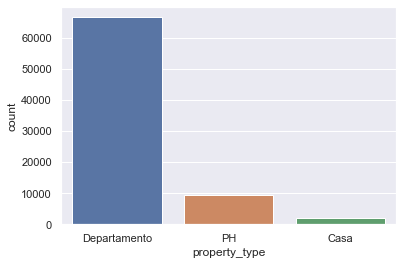

In [16]:
# Imprimimos la distribucion de propiedades y atendemos a que ésta sigue igual en cuanto a la cantidad de las mismas antes
# de hacer este filtrado de outliers. 
sns.countplot(x="property_type", data=df_sigma)

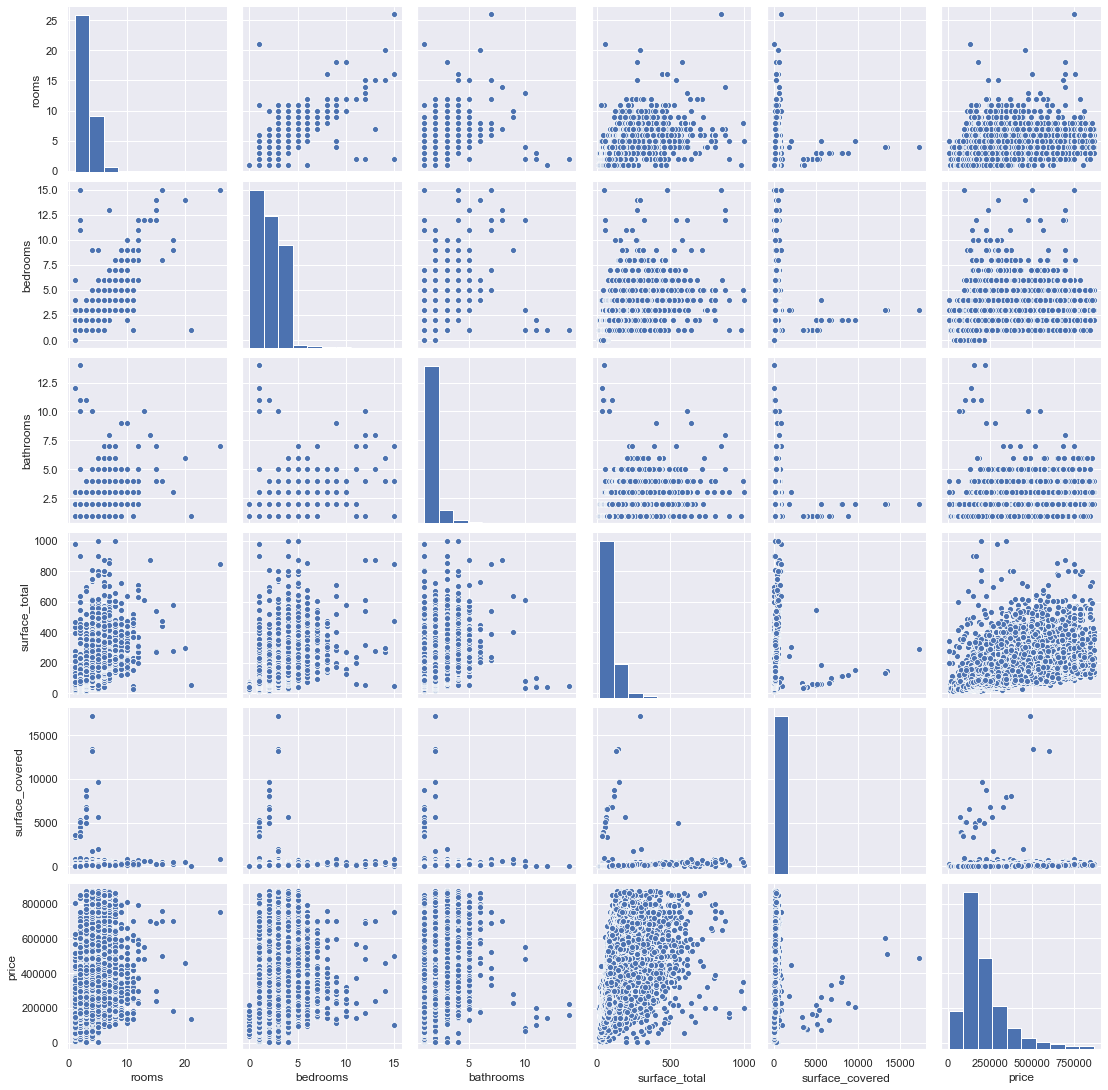

In [17]:
# Chequamos las distribuciones de todo el data set hasta aquí.
sns.pairplot(data=df_sigma)
plt.show()

In [18]:
# Una vez completada la tarea de detectar y eliminar outliers, se procede a hacer un encoding de las variables categoricas
# como lo son las propiedades. Usamos un one hot encoding entendiendo que si se hace un labelencoding, habra algunas variables
# con mas peso que otras. 
dummies = pd.get_dummies(df_sigma["property_type"])
dummies

,Casa,Departamento,PH
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1
...,...,...,...
146553,0,1,0
146554,0,0,1
146555,0,0,1
146556,0,0,1


In [19]:
# Concatenamos las nuevas columnas y dropiamos la de propiedades.
df_prop = pd.concat([df_sigma,dummies],axis=1)
df_prop = df_prop.drop(["property_type"],axis="columns")
df_prop

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
...,...,...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,0,1,0
146554,4.0,3.0,3.0,175.0,111.0,570000.0,0,0,1
146555,3.0,2.0,2.0,144.0,134.0,480000.0,0,0,1
146556,4.0,2.0,2.0,317.0,143.0,530000.0,0,0,1


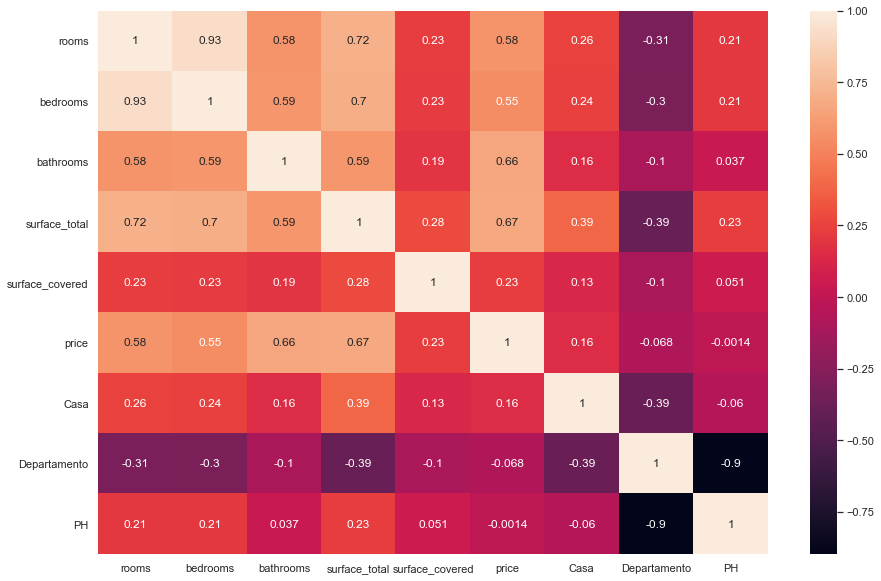

In [20]:
# Sacamos una muestra con la mitad de los datos para corroborar la correlación de los mismos.
fig = plt.figure(figsize=(15,10))
muestra = df_prop.sample(n=39125,random_state=1)
sns.heatmap(muestra.corr(), annot = True)
plt.show()

In [21]:
# Contamos tanto con datos discretos (baños, habitaciones,dormitorios), como asi tambien continuos (superficies)
# Por lo que es impresindible escalarlos utilizando StandardScaler para facilitar su analisis posterior.
from sklearn.preprocessing import StandardScaler

In [22]:
# Considerando la variable y=precio para Machine learning, es mejor no escalar este feature ya que no cumpliría con la 
# función de predecir correctamente el precio a su vez que de nada serviría escalar las variables dummies, por lo que se
# crea una variable nueva que contenga estos features y escalamos los demas.
price = df_prop[["price","Departamento","Casa","PH"]]
price

,price,Departamento,Casa,PH
0,153000.0,1,0,0
1,159000.0,0,0,1
2,125000.0,0,0,1
3,295000.0,0,0,1
5,150000.0,0,0,1
...,...,...,...,...
146553,620000.0,1,0,0
146554,570000.0,0,0,1
146555,480000.0,0,0,1
146556,530000.0,0,0,1


In [23]:
df_standard = df_prop.drop(["price","Departamento","Casa","PH"], axis=1)
df_standard 

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0
...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0
146554,4.0,3.0,3.0,175.0,111.0
146555,3.0,2.0,2.0,144.0,134.0
146556,4.0,2.0,2.0,317.0,143.0


In [26]:
scaled_features = StandardScaler().fit_transform(df_standard.values) 
scaled_features

array([[ 3.26936153,  4.93037856,  0.68317429,  0.78427793,  0.39658425],
       [-0.75816205, -0.93501428,  0.68317429, -0.28336145, -0.13507566],
       [-0.75816205, -0.93501428, -0.6432538 , -0.66466123, -0.2193632 ],
       ...,
       [ 0.04734266,  0.04255119,  0.68317429,  0.8452859 ,  0.35768231],
       [ 0.85284738,  0.04255119,  0.68317429,  3.48388037,  0.41603522],
       [ 0.04734266,  0.04255119,  0.68317429,  0.86053789,  0.42900254]])

In [27]:
scaled_features_df = pd.DataFrame(scaled_features, index=df_standard.index, columns=df_standard.columns) 
scaled_features_df

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,3.269362,4.930379,0.683174,0.784278,0.396584
1,-0.758162,-0.935014,0.683174,-0.283361,-0.135076
2,-0.758162,-0.935014,-0.643254,-0.664661,-0.219363
3,-0.758162,-0.935014,-0.643254,-0.054582,-0.186945
5,-0.758162,-0.935014,-0.643254,-0.496889,-0.148043
...,...,...,...,...,...
146553,0.852847,1.020117,0.683174,0.265710,0.137238
146554,0.852847,1.020117,2.009602,1.318098,0.208558
146555,0.047343,0.042551,0.683174,0.845286,0.357682
146556,0.852847,0.042551,0.683174,3.483880,0.416035


In [28]:
# Una vez corregidos y escalado los datos, volvemos a concatenar las variables escaladas con los demas features que habiamos
# separado antes en la variable "price".
df_scaler = pd.concat([scaled_features_df, price], axis= "columns")

df_scaler

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Departamento,Casa,PH
0,3.269362,4.930379,0.683174,0.784278,0.396584,153000.0,1,0,0
1,-0.758162,-0.935014,0.683174,-0.283361,-0.135076,159000.0,0,0,1
2,-0.758162,-0.935014,-0.643254,-0.664661,-0.219363,125000.0,0,0,1
3,-0.758162,-0.935014,-0.643254,-0.054582,-0.186945,295000.0,0,0,1
5,-0.758162,-0.935014,-0.643254,-0.496889,-0.148043,150000.0,0,0,1
...,...,...,...,...,...,...,...,...,...
146553,0.852847,1.020117,0.683174,0.265710,0.137238,620000.0,1,0,0
146554,0.852847,1.020117,2.009602,1.318098,0.208558,570000.0,0,0,1
146555,0.047343,0.042551,0.683174,0.845286,0.357682,480000.0,0,0,1
146556,0.852847,0.042551,0.683174,3.483880,0.416035,530000.0,0,0,1


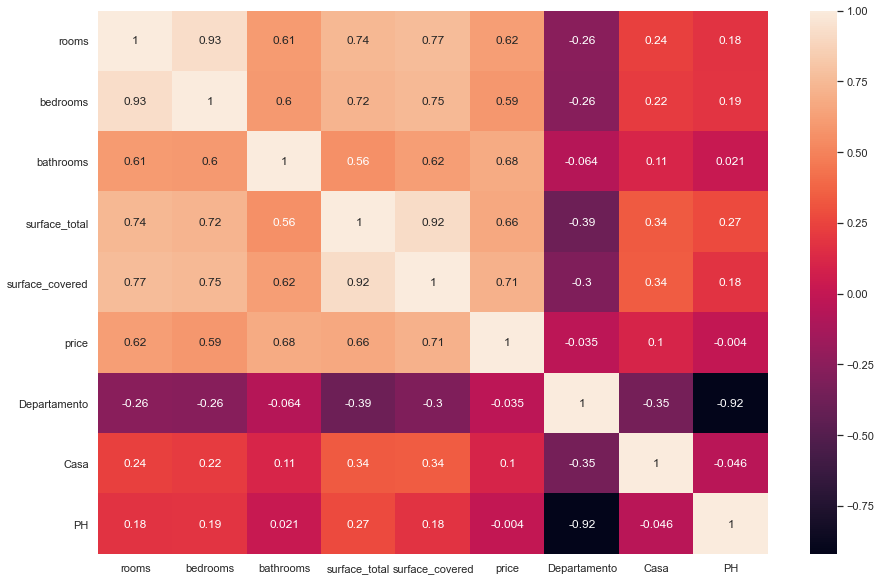

In [29]:
# Nuevamente analizamos la correlación de las variables.
fig = plt.figure(figsize=(15,10))
muestra1 = df_scaler.sample(n=1000,random_state=1)
sns.heatmap(muestra1.corr(),annot = True)
plt.show()

In [30]:
# Para este tramo, podemos concluir que si bien las correlaciones bajaron medianamente poco que al principio de la limpieza
# vamos a analizar como se comportarian las variables utilizadas en el primer proyecto con los nuevos modelos aprendidos en
# el sprint 2. Utilizaremos reduccion de dimensionalidad (PCA) para que solo queden los datos mas importantes de las variables
# que se utilizaron el proyecto 1 con la diferencia que estos estan escalados y limpios.

In [12]:
# Importamos las librerías que se utilizaran en este tramo.
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [32]:
# Aplicamos PCA a los baños y las superficies cubiertas, las mismas variables que el proyecto 1.
model = PCA(n_components= 2)

X = df_scaler[["bathrooms","surface_covered"]]
y = df_scaler.price

In [33]:
# Y separamos en Train y Test para comenzar con el modelado.
X_nuevo = model.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y,test_size=0.33, random_state=42)

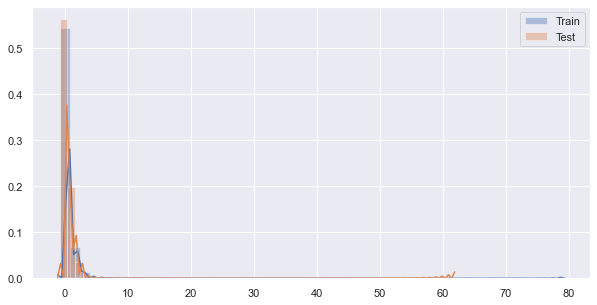

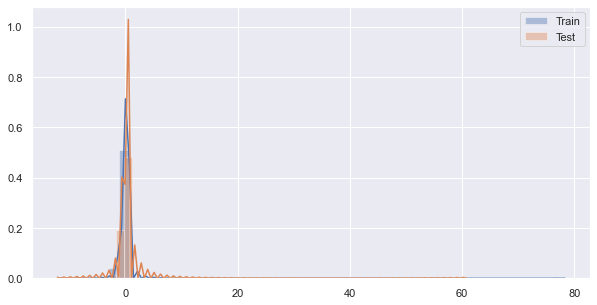

In [34]:
# Antes como buena practica, chequeamos que las distribuciones del Train and Test que obtenemos sean similares.
for i in range(X_train.shape[1]):
    plt.figure(figsize=(10,5))
    sns.distplot(X_train[:,i], label = "Train")
    sns.distplot(X_test[:,i],label = "Test")
    plt.legend()
    plt.show()

In [35]:
# chequeamos que la proporción de cada clase en las etiquetas en ambos conjuntos sea parecida.
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  219561.02418647235
Proporcion de etiquetas positiva en los datos de Test:  219918.9491538551


In [36]:
# Siendo la misca distribucion y proporcion, comenzamos con un modelo BenchMarck tipico del desarrollo del proyecto.
# Se útilizara un modelo de Regresión Lineal.

In [37]:
linear_model = LinearRegression()

In [38]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [39]:
# A diferencia del primer proyecto, se utilizara la metrica R^2 y no RMSE. Sin embargo al momento de comparar los proyectos
# se utilizara R^2 en el proyecto 1 para una mejor comparación.

In [40]:
# Predecimos como se comporta nuestro modelo.
y_train_pred_bench = linear_model.predict(X_train)
y_test_pred_bench = linear_model.predict(X_test)

r2_train = np.sqrt(r2_score(y_train, y_train_pred_bench))
r2_test = np.sqrt(r2_score(y_test, y_test_pred_bench))

print(f'Modelo: Regresión Lineal')
print(f'R2 en Train: {r2_train}')
print(f'R2 en Test: {r2_test}')

Modelo: Regresión Lineal
R2 en Train: 0.6709926826373674
R2 en Test: 0.6612560592008622


In [41]:
# Momento de utilizar Arboles de Decision, atendiendo a que en esta parte del proyecto se usan los mismos modelos utilizados 
# que en el anterior. Esto tambien quiere decir que se utilizara los mismo hiperparametros.
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [42]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [43]:
# Predecimos como se comporta nuestro modelo.
print("R2 Entrenamiento Árbol",r2_score(y_train,y_train_pred_tree))
print("R2 Árbol",r2_score(y_test,y_test_pred_tree))

R2 Entrenamiento Árbol 0.6515284514556614
R2 Árbol 0.6438068383967419


In [44]:
# Por último, vemos que ocurre con K vecinos mas cercanos.
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [45]:
y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)

In [46]:
# Predecimos como se comporta nuestro modelo.
print("R2 Entrenamiento KNN",r2_score(y_train,y_train_pred_knn))
print("R2 Test KNN", r2_score(y_test,y_test_pred_knn))

R2 Entrenamiento KNN 0.6369439951856015
R2 Test KNN 0.608941883755186


In [47]:
# Para finalizar, imprimos los score de todos los modelos para comparar con el primer proyecto.
print("Score BENCHMARK - REGRESIÓN: ",linear_model.score(X_train,y_train))
print("Score ÁRBOL: ",tree.score(X_train,y_train))
print("Score KNN: ",knn_regressor.score(X_train,y_train))

Score BENCHMARK - REGRESIÓN:  0.4502311801528909
Score ÁRBOL:  0.6515284514556614
Score KNN:  0.6369439951856015


#### Resultados del proyecto 1
##### Hiperparametros:
* KNN: 5
* Decision Tree: 5

##### RMSE:
* KNN: 
Raíz del error cuadrático medio en Train: 157551.48219846885 / 
Raíz del error cuadrático medio en Test: 178065.88671845474

* Decision Tree: 
Raíz del error cuadrático medio en Train: 175486.80591739502 / 
Raíz del error cuadrático medio en Test: 180585.2674907496

* BENCHMARK (Regresión): 
Raíz del error cuadrático medio en Train: 224663.3332314654 / 
Raíz del error cuadrático medio en Test: 233239.5190616432

##### R^2:
* KNN: 
R2 en Train: 0.8482599722810935 / 
R2 en Test: 0.8080966510505739
* Decision Tree: 
R2 en Train: 0.8075009278971615 / 
R2 en Test: 0.8019552294093494

* BENCHMARK (Regresión): 
R2 en Train: 0.6555358424443704 / 
R2 en Test: 0.6361483616437646
##### Score:
* BENCHMARK (Regresión): 0.4297272407292504
* Decision Tree: 0.6520577485547769
* KNN: 0.7195449805743215

In [48]:
df_scaler.shape

(78249, 9)

In [49]:
# Conclusión: Notamos que a comparacion del proyecto 1, los modelos no han sido ni mejores ni peores. La limpieza sin embargo
# desfavorecio el buen Score de KNN si comparamos con el primer proyecto, en cambio para Arboles de decision la diferencia
# no es muy significativa (casi nula), pero por otro lado el Benchmarck mejoró levemente. Estas conclusiones mas alla del
# KNN, son positivas ya que los resultados en todos los modelos salvo el benchmark, son iguales por lo tanto esto alienta
# a que cualquiera puede llegar a ser el mejor. Sin embargo como conclusion final para comenzar con la Parte B, se utiliza-
# -ra Arboles de Decision como mejor modelo de esta primera parte, y veremos si añadiendole mas variables a la X, podemos
# mejorarlo, siendo que el mismo competira con modelos mas avanzados. Una acotacion es que para esta parte, los modelos
# estan utilizando los mismos hiperparametros del primer proyecto a modo de comparacion. Como sabemos no siempre los mismos
# hiperparametros son mejores en todo los modelos por mas que sean los mismos ya que con la limpieza y el escalado que hicimos
# son totalmente diferentes y por lo tanto estos precisan de hiperpametros igual de diferentes.

## PARTE B - Modelos Avanzados


##### 1- Elige dos de los modelos avanzados vistos. Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
##### 2- Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
##### 3- Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.


In [78]:
# Para comenzar con esta parte B, vamos a copiar el Dataset y por otro lado utilizaremos el PCA en las nuevas variables
# predictoras. La idea es la siguiente, se utilizara dos variables que tengan que ver con el interior de las propiedades,
# como lo son los cuartos, por otro lado tambien de las variables Dummy se eligiran dos propiedades, y por ultimo la variable
# que mas correlacion tenga con el precio.
# Se eligio Baños y Habitaciones, ya que representan en como esta compuesta una propiedad y son las dos mayor correlacionas
# con el precio. Se eligio Departamento y PH, que si bien no tienen mucha correlacion con la precio, son los dos tipos de 
# propiedades mas numerosas del Dataset. Y por ultimo se eligio superficies cubiertas, que tienen un comportamiento similar
# a Superficiees totales, pero de las dos, la mayor correlacion esta en superficis cubiertas por lo tanto se elegira esa.

df_copy = df_scaler.copy()

pca_1 = PCA(n_components= 5)

X1 = df_copy[["surface_covered","bathrooms","Departamento","PH","rooms"]]
y1 = df_copy.price

X_new = pca_1.fit_transform(X1) 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_new, y1, test_size=0.30, random_state=42)

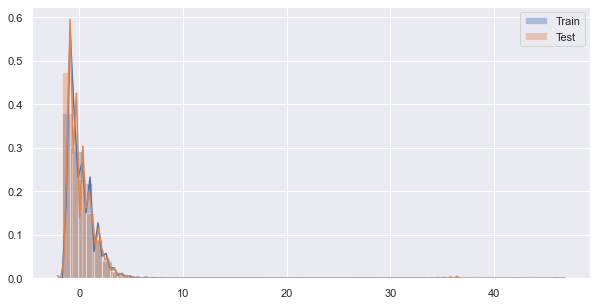

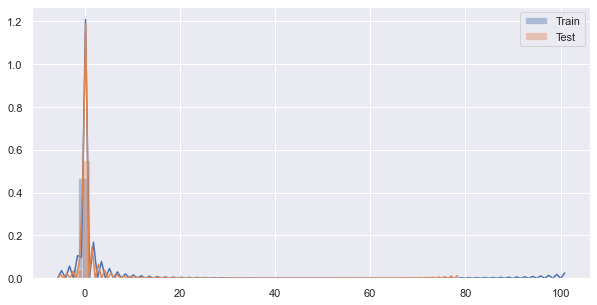

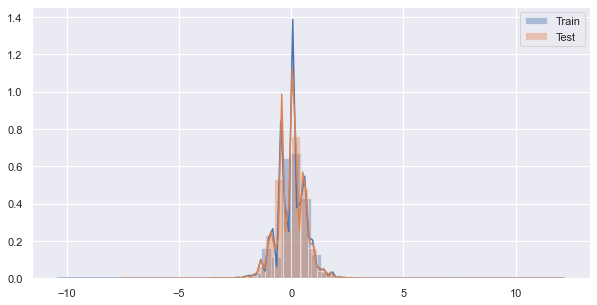

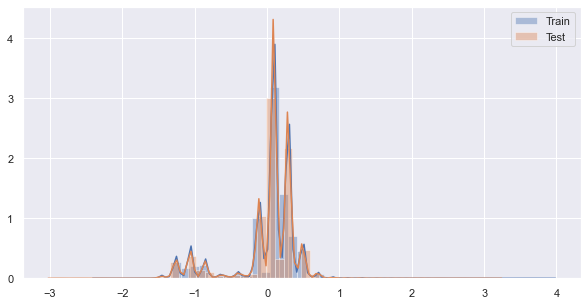

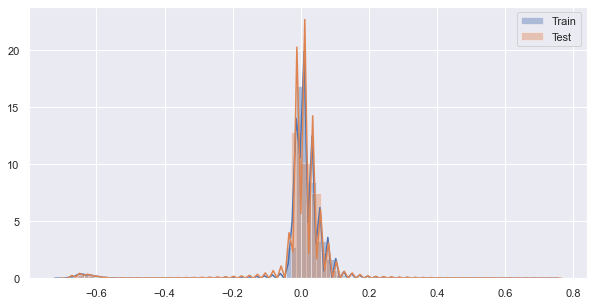

In [79]:
# Antes como buena practica, chequeamos que las distribuciones del Train and Test que obtenemos sean similares.
for i in range(X_train_1.shape[1]):
    plt.figure(figsize=(10,5))
    sns.distplot(X_train_1[:,i], label = "Train")
    sns.distplot(X_test_1[:,i],label = "Test")
    plt.legend()
    plt.show()

In [80]:
# chequeamos que la proporción de cada clase en las etiquetas en ambos conjuntos sea parecida.
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train_1.sum()/y_train_1.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test_1.sum()/y_test_1.size)

Proporcion de etiquetas positiva en los datos de Train:  219600.63168656663
Proporcion de etiquetas positiva en los datos de Test:  219862.33346112887


### Regresión y Regularización (Benchmark)

In [81]:
# El modelo Benchmarck tendra el cambio propuesto en la consigna, por un lado se utilizara en vez de la regresion lineal comun,
# una con atributos polinomicos, y una regularizacion del tipo Ridge.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Se utilizara un grado 3, por lo tanto el polinomio que compone la regresion será de orden 3. 
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_new = poly.fit_transform(X_train_1)
X_test_new = poly.fit_transform(X_test_1)
print(X_train_new.shape, X_test_new.shape)

(54774, 55) (23475, 55)


In [87]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train_1)

print(f'Pendientes: {reg_2.coef_}')
print(f'Ordenada: {reg_2.intercept_}')

y_train_pred_regresion = reg_2.predict(X_train_new)
y_test_pred_regresion = reg_2.predict(X_test_new)

Pendientes: [ 2.93117032e+12 -3.69450267e+10 -1.29671383e+12 -4.37627216e+12
  5.47272694e+11  8.15399480e+11 -8.60302218e+10 -2.88999317e+12
 -1.02844913e+13  4.13218177e+12 -1.89772096e+08 -1.42023198e+10
 -5.69476684e+10 -9.94038392e+09 -2.70163472e+11 -2.12005555e+12
 -5.46513028e+11 -4.14021271e+12 -1.27471033e+12 -1.85128513e+12
 -8.08198088e+10  1.41016322e+10  5.25117770e+11  1.82000068e+12
  3.96590766e+11 -6.47554181e+08 -4.72095681e+10 -1.64030157e+11
 -1.52075458e+10 -8.69108866e+11 -6.02292839e+12 -9.18162742e+11
 -1.04420401e+13 -2.84360704e+12 -3.90611051e+12  4.48613152e+05
  4.65709045e+07  1.11371182e+08 -1.84327863e+07  1.62921352e+09
  7.68967052e+09 -5.77801921e+08  6.88885162e+09 -1.91742345e+09
  5.18956189e+09  1.92699265e+10  1.34757728e+11  5.66238104e+09
  2.34219532e+11  6.77502654e+09  2.94078612e+11 -5.57133383e+09
 -1.17876119e+10  5.92764641e+11  1.11807104e+12]
Ordenada: 1037097287513.454


In [88]:
# Notamos que con esta correcion del benchmarck, el mismo ha mejorado notablemente. Sin embargo a continuacion se usara una
# regularizacion para evitar o analizar si no esta overfittiado.
r2_train_regresion = np.sqrt(r2_score(y_train_1, y_train_pred_regresion))
r2_test_regresion = np.sqrt(r2_score(y_test_1, y_test_pred_regresion))
print("TRAIN: " , r2_train_regresion)
print("TEST: " ,r2_test_regresion)

TRAIN:  0.8209076338329029
TEST:  0.7980559003788789


In [74]:
reg_ridge = Ridge(alpha= 0.001)
reg_ridge.fit(X_train_new,y_train_1)
print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [ 1.55524216e+05  2.66293441e+05  6.60462059e+04  9.74461633e+03
  1.20883008e+04  7.05403800e+02  3.75171954e+04  2.22923575e+04
  5.74501502e+04  4.75433077e+04 -3.47098575e+04  3.60181089e+04
  1.20407655e+05  1.27643342e+05  1.35521586e+04  3.02112045e+04
  3.26325261e+04 -2.07531421e+04 -1.02758040e+04 -5.11621645e+03
 -1.27558882e+03 -5.86401507e+03  1.10093043e+02  4.60078725e+03
 -1.80882497e+03  5.83193002e+03  7.18563581e+03  3.04927322e+04
  6.03552071e+03 -8.54483374e+02  1.67338579e+03 -5.15036948e+03
  5.84294012e+03 -2.35724876e+04 -2.98037568e+04 -1.08484965e+03
 -5.38995128e+03 -1.70986589e+04 -4.23148622e+02  2.49043988e+03
  1.96765874e+04 -1.94775594e+04  2.18981761e+04 -6.20574191e+04
 -7.99836681e+04  7.46561559e+02  3.89174315e+03  5.42011026e+03
  4.05065486e+03 -1.92144227e+04 -2.09106504e+04  8.74778974e+03
  1.00578907e+04  7.00306176e+03  3.11794798e+03]
Ordenada: 245250.14175012347


In [75]:
y_train_pred_ridge = reg_ridge.predict(X_train_new)
y_test_pred_ridge = reg_ridge.predict(X_test_new)

In [76]:
# Notamos que aún asi con la regularizacion, el modelo benchmarck se comporta de la misma manera. Por lo tanto no hay indicios
# de que el modelo tienda a Overfitting. La mejoría a sido notable, por lo que se destaca que los datos hasta aqui han sido
# o han tenido un comportamiento no lineal.
r2_train_ridge = np.sqrt(r2_score(y_train_1, y_train_pred_ridge))
r2_test_ridge = np.sqrt(r2_score(y_test_1, y_test_pred_ridge))
print("TRAIN: ", r2_train_ridge)
print("TEST: " ,r2_test_ridge)

TRAIN:  0.8209076335156799
TEST:  0.7980555917809811


### Sin Optimizar

In [50]:
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [54]:
# Entrenamos el modelo con todos sus valores por defecto, a excepsion del random_state y n_jobs.
# Empezamos con un modelo de Bagging y otro de Boosting, se eligira Random Forest y XGBoost, respectivamente.
forest = RandomForestRegressor(n_jobs=-2, random_state = 1)
forest.fit(X_train_1,y_train_1)

RandomForestRegressor(n_jobs=-2, random_state=1)

In [132]:
# Para ser que sus valores fueron entrenados por defecto, los resultados no son tan malos.
y_train_pred_forest = forest.predict(X_train_1)
y_test_pred_forest = forest.predict(X_test_1)
print("R2 Random Forest para el conjunto Train: ", r2_score(y_train_1, y_train_pred_forest))
print("R2 Random Forest para el conjunto Test: ",r2_score(y_test_1, y_test_pred_forest))

print("RMSE Entrenamiento: ", np.sqrt(mean_squared_error(y_train_1, y_train_pred_forest)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test_1, y_test_pred_forest)))


R2 Random Forest para el conjunto Train:  0.8143791618629065
R2 Random Forest para el conjunto Test:  0.7596497535327379
RMSE Entrenamiento:  61990.34616275276
RMSE Test:  70435.74595405425


In [52]:
# El AdaBoost fue escogido ya que sus costos computacionales no son tan altos con respecto al XGBoost.
xgb = xgboost.XGBRegressor()

In [134]:
xgb.fit(X_train_1,y_train_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
y_train_pred_xgb = xgb.predict(X_train_1)
y_test_pred_xgb = xgb.predict(X_test_1)

In [136]:
# Entrenado por defecto, es bastante alentador para luego elegir los mejores hiperparametros.
print("R2 Entrenamiento",r2_score(y_train_1,y_train_pred_xgb))
print("R2 Test", r2_score(y_test_1,y_test_pred_xgb))

print("RMSE Entrenamiento: ", np.sqrt(mean_squared_error(y_train_1, y_train_pred_xgb)))
print("RMSE Test: ", np.sqrt(mean_squared_error(y_test_1, y_test_pred_xgb)))


R2 Entrenamiento 0.7919797312203365
R2 Test 0.7611084912482247
RMSE Entrenamiento:  65624.12464804441
RMSE Test:  70221.67574937906


###              Optimizados  

In [51]:
# Comenzamos con el Cross Validation para saber cuan representativos son las variables que componen a X.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
tree_grid = DecisionTreeRegressor()
forest_grid = RandomForestRegressor()

forest_scores = cross_val_score(forest, X1, y1, cv=4)
xgb_scores = cross_val_score(xgb, X1,y1,cv=4)

In [139]:
# A simple vista, para el Random Forest, sus variables son representativas al igual que el XGBoost.
print(forest_scores, xgb_scores)
print("R2 para Random Forest: %0.2f (+/- %0.2f)" % (forest_scores.mean(), forest_scores.std() * 2))
print("R2 para XGBoost: %0.2f (+/- %0.2f)" % (xgb_scores.mean(), xgb_scores.std() * 2))

[0.76126187 0.75077372 0.73735722 0.76491404] [0.75647808 0.75158976 0.74087623 0.75609189]
R2 para Random Forest: 0.75 (+/- 0.02)
R2 para XGBoost: 0.75 (+/- 0.01)


In [143]:
# Definimos las grillas de hiperparametros tanto para Random Forest como para XGBoost. Tambien lo haremos para el Arbol de 
# Decision de la parte A ya que fue el mejor modelo comparado con los demás. 
param_grid_tree = {"max_depth": np.arange(1,100),
                    "random_state": [42]}

param_grid_forest = {"n_estimators":[100,200,300,350],
                    "max_features": ["auto", "log2","sqrt"],                
                     "max_depth": [5,10,15,20]}

param_grid_xgb = {"n_estimators":[100,200,300],
                    "max_depth":[4,6,8],
                  "gamma":[0,1,5],
                   "eta":[0.1,0.01,0.011],
                    "max_leaves":[4,5,6],
                   "subsample":[0.5,0.75,1.0]}

In [78]:
# Probamos la grilla en Arbol de decision para que pruebe los distintos hiperparametros.
model_tree = GridSearchCV(tree_grid, param_grid=param_grid_tree,cv=4,n_jobs=-2)
model_tree.fit(X_train_1,y_train_1)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'random_state': [42]})

In [79]:
# Analizamos ahora los mejores hiperparametros Decision Tree.
print("Mejores parametros Árbol de Decisión: "+str(model_tree.best_params_))
print("Mejor Score Árbol de Decisión: "+str(model_tree.best_score_))

Mejores parametros Árbol de Decisión: {'max_depth': 14, 'random_state': 42}
Mejor Score Árbol de Decisión: 0.7345119856762056


In [95]:
# Ahora PRobamos con Random Forest.
model_forest = GridSearchCV(forest_grid,param_grid=param_grid_forest,cv=4,n_jobs=-2)
model_forest.fit(X_train_1,y_train_1)

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-2,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [100, 200, 300, 350]})

In [96]:
# Analizamos ahora los mejores hiperparametros para Random Forest.
print("Mejores parametros Random Forest: "+str(model_forest.best_params_))
print("Mejor Score Random Forest: "+str(model_forest.best_score_))

Mejores parametros Random Forest: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 300}
Mejor Score Random Forest: 0.7535047864620833


In [144]:
# Momento de Probar con XGBoost
model_xgb = GridSearchCV(xgb,param_grid=param_grid_xgb,cv=4,n_jobs=-2)
model_xgb.fit(X_train_1,y_train_1)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [145]:
# Analizamos ahora los mejores hiperparametros para XGBoost.

print("Mejores parametros XGBoost: "+str(model_xgb.best_params_))
print("Mejor Score XGBoost: "+str(model_xgb.best_score_))

Mejores parametros XGBoost: {'eta': 0.1, 'gamma': 0, 'max_depth': 6, 'max_leaves': 4, 'n_estimators': 200, 'subsample': 1.0}
Mejor Score XGBoost: 0.7554396536883793


In [56]:
tree_op = DecisionTreeRegressor(max_depth=14, random_state = 42)
forest_op = RandomForestRegressor(max_depth=15,max_features="sqrt",n_estimators=300)
xgb_op = xgboost.XGBRegressor(eta=0.1,gamma=0,max_depth=6,max_leaves=4,n_estimators=200,subsample=1.0)

In [58]:
# Momento de entrenar los modelos con los mejores hiperparametros obtenidos del gridsearch.
tree_op.fit(X_train_1,y_train_1)
forest_op.fit(X_train_1,y_train_1)
xgb_op.fit(X_train_1,y_train_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=6,
             max_leaves=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1.0, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
# Notamos que para Arbol de Decision, la mejoría fue notable con respecto al modelo de la parte A. Si bien tiene mas variables
# hay que destacar que a diferencia de antes, el modelo ahora cuenta con su mejor hiperparametro.
y_train_pred_tree_op = tree_op.predict(X_train_1)
y_test_pred_tree_op = tree_op.predict(X_test_1)

print("R2 Entrenamiento Arbol de Decision",r2_score(y_train_1,y_train_pred_tree_op))
print("R2 Test Arbol de Decision: ", r2_score(y_test_1,y_test_pred_tree_op))

R2 Entrenamiento Arbol de Decision 0.8025357443437705
R2 Test Arbol de Decision:  0.7504811911473481


In [60]:
# Random Forest es levemente superior a Arbol de Decisión, pero no deja de ser un buen modelo.
y_train_pred_forest_op = forest_op.predict(X_train_1)
y_test_pred_forest_op = forest_op.predict(X_test_1)

print("R2 Entrenamiento Arbol de Decision",r2_score(y_train_1,y_train_pred_forest_op))
print("R2 Test Arbol de Decision: ", r2_score(y_test_1,y_test_pred_forest_op))


R2 Entrenamiento Arbol de Decision 0.8092106615512316
R2 Test Arbol de Decision:  0.7627688490845925


In [61]:
y_train_pred_xgb_op = xgb_op.predict(X_train_1)
y_test_pred_xgb_op = xgb_op.predict(X_test_1)

print("R2 Entrenamiento XGBoost",r2_score(y_train_1,y_train_pred_xgb_op))
print("R2 Test Arbol de XGBoost: ", r2_score(y_test_1,y_test_pred_xgb_op))

R2 Entrenamiento XGBoost 0.7839345469293302
R2 Test Arbol de XGBoost:  0.7572957904066897


In [85]:
print("Score Regresion", reg_2.score(X_train_new, y_train_1))
print("Score ÁRBOL: ",tree_op.score(X_train_1,y_train_1))
print("Score Random Forest: ",forest_op.score(X_train_1,y_train_1))
print("Score XGBoost: ",xgb_op.score(X_train_1,y_train_1))

Score Regresion 0.6738893432851354
Score ÁRBOL:  0.8025357443437705
Score Random Forest:  0.8092106615512316
Score XGBoost:  0.7839345469293302


In [ ]:
# Conclusion final PARTE 1: Analizando el desempeño de los modelos de la parte A con los de esta seccion finalizada, la mejoria
# fue enorme y entra dentro de los valores esperados, mas que nada arbol de decision que paso de un 65% a 80% con tan solo
# elegir el mejor hiperparametro. Que decir de los demas modelos, tanto el Random Forest como el XGBoost son buenos modelos
# que si bien se esperaba un mayor score de prediccion por sus altos costos computacionales, he quedado satisfecho con los 
# mismo ya que su rendimiento puede estar ligado a otros factores ajenos como es la seleccion de los parametros de la grilla,
# la limpieza de datos, las variables elegidas, etc... Por otro lado se pudo mejorar notablemente el modelo benchmark, dejando
# en claro que los datos tenian la caracteristicas de ser no lineales. Esto es asi que se paso de un 45% a 67%, demasiado
# para la naturaleza del problema. 
# Como eventualmente hay que elegir el mejor modelo que prediga el precio de las propiedades, el mejor por muy poco fue 
# Random Forest. 

In [ ]:
# Conclusion final PARTE 2: Prosiguiendo y finalizando ya con esta parte, la comparacion de scores en ambos proyecto fue 
# muy distinta y fue muy favorable. La conclusion final del proyecto anterior quedo como reflexion aprender nuevas tecnicas
# y modelos que mejoraran nuestra performance para este proyecto y asi fue el caso.
# Si bien la limpieza del data set perjudico que KNN sea el mejor modelo como lo fue en el proyecto 1(P1), esto configuro una
# apertura a las posibilidades de mejorar arbol de decision que tanto en este proyecto como el anterior tuvieroon el mismo
# score, y que finalizo con un satisfactorio 80% (y que con la combinacion de variables correctas hubiera sido mejor). Por 
# lo que no seria mal en un contexto similar, confiar solo en arbol de decision siendo un modelo confiable cuando su
# hiperparametro es el correcto. 

## PARTE C - Interpretación de modelos

* De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:


##### 1- ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

##### 2- ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

### 1 - PCA, Regresión y Árboles de Decisión

In [40]:
# Chequeemos que variables fueron las mas importantes según el PCA para nuestra predicción.
PCA_ = pd.DataFrame(data = pca_1.components_, columns = X1.columns,index   = ["PC1","PC2","PC3","PC4","PC5"])
PCA_ 

,surface_covered,bathrooms,Departamento,PH,rooms
PC1,0.408088,0.633271,-0.072632,0.040826,0.652296
PC2,0.910365,-0.333503,0.004854,-0.005931,-0.244852
PC3,0.067583,0.684458,0.206958,-0.178214,-0.672576
PC4,0.007974,-0.138746,0.694542,-0.660752,0.248403
PC5,0.008314,0.003394,0.685186,0.727973,0.022236


In [ ]:
# En la primera componente vemos que son los "rooms" la que recoge la mayor informacion con respecto a la demas variables.
# Le siguen los "bathrooms" (que es muy parecida en valores), y "surface_covered" como variables mas importantes.

# En la segunda componente se nota la superioridad del "surface_covered" como contenedor de mayor infomacion de la misma.
# Siendo muy superior a los demas.

# Ya la tercera componente, se puede apreciar que los baños vuelven a ser la variable con mas información siendo la de 
# mayor peso. Y le sigue muy por detras "Departamento", que sin embargo comparado con las demas variables, es un buen numero.

# Para la cuarta componente y como vimos anteriormente, Departamentos por excelencia es la variable con mas peso.

# Y para finalizar, en la quinta componente, la variable con mas peso fue PH. Esto puede significar que 
# para predecir el precio de una determinada propiedad, que sea un departamento o PH ya es considerar una aproximacion a
# "el precio de esta propiedad es el siguiente por ser un departamento en tal lugar o PH en tal otro". No sonaría descabe-
# -llado pensarlo de este modo si tenemos en cuenta otros factores que son ajenos a este analisis pero que tienen que ver
# por ejemplo con las prestaciones de la propiedad o su ubicacion.

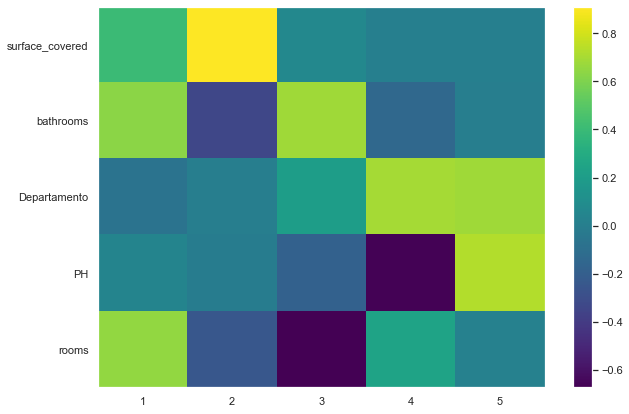

In [64]:
# Para una representacion mas ilustrativa del cuadro presentado anteriormente, podemos realizar un cuadro de color donde
# los mismo miden la intensidad de participacion de cada variable en cada componente, cual fue la de mayor peso en cada
# transformación y cuanta información tenian presente. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
componentes = pca_1.components_
plt.imshow(componentes.T, cmap="viridis", aspect="auto")
plt.yticks(range(len(X1.columns)), X1.columns)
plt.xticks(range(len(X1.columns)), np.arange(pca_1.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [48]:
# Llego el momento de observar cual es la variable que mas informacion proporciono a los modelos, en este caso teniamos un 
# guiño por la correlacion analizada posteriormente que "surface_covered" y "bathrooms" eran las que podian llegar a ser
# las mejores para los modelos. Sin embargo quedo mas que claro que no solo una buena correlacion podria interferir en el 
# analisis de nuestros modelos, esto se ve en "Departamentos" (30%), siendo la mejor por poco contra la superficie (28%) y
# los baños muy por dejado de donde se esperaba.Igualmente no hay que confundirse con que estas variables son mejores
# predictoras, sino mas bien las que mayor informacion tienen para los modelos.
# Las dos variables que menos informacion dieron fueron PH y Rooms, siendo las dos seleccionadas para cumplir con el obje-
# -tivo de: dos componenes de una propiedad y dos tipos de propiedad para el modelo. Notamos que su participacion no fue muy
# significativa por lo que se podrian haber mejorado o no los modelos si estas variables no estaban.
pd.DataFrame(PCA_.mean())

,0
surface_covered,0.280465
bathrooms,0.169775
Departamento,0.303782
PH,-0.015220
rooms,0.001101


In [ ]:
# Se utiliza la media de participacion de cada variable por componente del primer cuadro del analisis del PCA siendo este
# estadistico el mas representativo para el analisis presente.

[0.53848019 0.26420974 0.13399925 0.05970376 0.00360706]


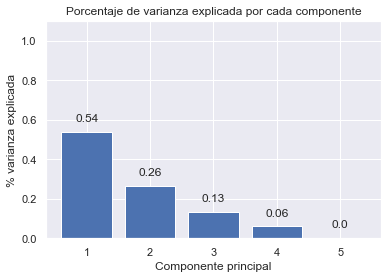

In [41]:
# Ahora podemos conocer la varianza explicada por cada una de ellas, la proporción respecto al total y 
# la proporción de varianza acumulada.
print(pca_1.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x = np.arange(pca_1.n_components_) + 1, height = pca_1.explained_variance_ratio_)

for x, y in zip(np.arange(len(X1.columns)) + 1, pca_1.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x,y),textcoords="offset points",xytext=(0,10),ha="center")

ax.set_xticks(np.arange(pca_1.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title("Porcentaje de varianza explicada por cada componente")
ax.set_xlabel("Componente principal")
ax.set_ylabel("% varianza explicada");

In [ ]:
# La primera componente explica el 54% de la varianza observada en los datos y la segunda el 26%. 
# La última componente representa el 0% de varianza explicada en el modelo.

#### Regresión:
Pendientes: [ 2.93117032e+12, -3.69450267e+10, -1.29671383e+12, -4.37627216e+12,5.47272694e+11 ... ,6.77502654e+09,  2.94078612e+11, -5.57133383e+09,
 -1.17876119e+10,  5.92764641e+11,  1.11807104e+12]
 
Ordenada: 244854.59624420368

#### Ridge (Regularización):
Pendientes: [ 1.55524216e+05,  2.66293441e+05,  6.60462059e+04,  9.74461633e+03,1.20883008e+04,  7.05403800e+02 ... -2.09106504e+04,  8.74778974e+03,1.00578907e+04,  7.00306176e+03,  3.11794798e+03]

Ordenada: 244854.59624420368

In [ ]:
# Los coeficientes en las pendientes son de los valores estimados por la regresion a su vez que la ordenada nos dara el 
# valor fijo que toma la X para cada coeficiente.

In [ ]:
# Para evitar el overfitting del modelo a medida que ponemos mas atributos, utilizamos una regularizacion la cual penaliza
# los parametros de nuestro modelo. Usamos el Ridge ya que "penalizara" introduciendo un termino que castigue los valores
# altos de los coeficientes del modelo de regresión.
# Notamos que lo hace efectivamente, aunque los scores en ambos modelos fueron casi iguales, era impresindible hacer esta
# regularizacion para poder eliminar cualquier sospecha de overfitting.

In [97]:
# Para Random Forest fue: "Surface_covered"
importancia_predictores = pd.DataFrame({"Predictor": X1.columns,"Importancia": forest_op.feature_importances_})
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values("Importancia", ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,Importancia
0,surface_covered,0.457287
4,rooms,0.170466
1,bathrooms,0.127980
2,Departamento,0.124418
3,PH,0.119848


In [ ]:
# Este resultado no es de extrañar ya que como vimos en la correlación, esta variable estaba correlacionada con el precio
# siendo muy superior a las demas variables. Podemos notar que si bien "Deptarmentos" y "bathrooms" eran las variables
# con mas informacion despues de surface_covered, su rendimiento en cuanto a impotancia para el Random Forest estuvo muy
# semenjante a las demas variables que no proporcionaban tanta información. Rooms sera el mejor a su de todas las variables
# que ayudaron a mejorar el modelo, y siendo PH la peor de todas.

### Distribución de Errores

In [95]:
print("RMSE Entrenamiento Benchmark: ", np.sqrt(mean_squared_error(y_train_1, y_train_pred_regresion)))
print("RMSE Test Benchmark: ", np.sqrt(mean_squared_error(y_test_1, y_test_pred_regresion)))  
print("-----------------------------------------------------------------")
print("RMSE Entrenamiento Arbol de Decision: ", np.sqrt(mean_squared_error(y_train_1, y_train_pred_tree_op)))
print("RMSE Test Arbol de Decision: ", np.sqrt(mean_squared_error(y_test_1, y_test_pred_tree_op)))
print("-----------------------------------------------------------------")
print("RMSE Entrenamiento Random Forest: ", np.sqrt(mean_squared_error(y_train_1, y_train_pred_forest_op)))
print("RMSE Test Random Forest: ", np.sqrt(mean_squared_error(y_test_1, y_test_pred_forest_op)))
print("-----------------------------------------------------------------")
print("RMSE Entrenamiento XGBoost: ", np.sqrt(mean_squared_error(y_train_1, y_train_pred_xgb_op)))
print("RMSE Test XGBoost: ", np.sqrt(mean_squared_error(y_test_1, y_test_pred_xgb_op)))

RMSE Entrenamiento Benchmark:  82166.19811915983
RMSE Test Benchmark:  86574.10519666597
-----------------------------------------------------------------
RMSE Entrenamiento Arbol de Decision:  63937.395774341734
RMSE Test Arbol de Decision:  71766.6173628486
-----------------------------------------------------------------
RMSE Entrenamiento Random Forest:  62847.46256016252
RMSE Test Random Forest:  69977.22083888181
-----------------------------------------------------------------
RMSE Entrenamiento XGBoost:  66881.0931942068
RMSE Test XGBoost:  70779.82540215155


In [ ]:
# Si vemos el RMSE, notamos que el mejor modelo siendo el que menos error obtuvo en el proceso fue Random Forest. Esto concuerda
# con la conclusion final anteriormente nombramos el cual habiamos elegido al Random Forest como el mejor por apenas superar
# un poco al clasico Arbol de decision. Si bien la diferencia de errores entre el random forest y arbol de decision no es muy
# significativa, no quita que el primero sea el mejor. Desde el test hasta el train, si bien todos los modelos fueron medianamente 
# parejos, y a modo de eleccion para elegir el mejor modelo, prefiero el que menos error tuvo considerando a Random Forest
# como el mejor. Sin embargo no quiero descartar el Arbol de Decision clasico, siguendo con la premisa "garbage in garbage out"
# por lo cual para un chequeo rapido de una situacion particular, y sin querer pasar por costos computacionales muy elevados,
# se tendra a la cabeza ese modelo en situaciones similares.
# El benchmark fue el peor de los modelos, pero como es solo a modo de comparacion para saber donde estabamos parados, no 
# obtuvo un mal rendimiento e incluso mejoro notablemente, dando a entender que el problema principal de los datos fue que 
# estos seguian un comportamiento no lineal.
# Si buscamos posibles fallas, pudimos notar a ciertas variables que no proporcionaban tanta informacion y tampoco importancia
# como lo fue el PH por poner un ejemplo. A lo mejor se debio que se bien tanto departamento como PH eran de las propiedades
# mas numerosas, en proporcion, PH quedo muy insignificante. Otro factor tambien pudo ser el escalado de los datos atendiendo
# a que algunos eran valores discretos y otros continuos, por lo que en un principio esto configuro un desafio en la parte
# del preprocesamiento. Creo que esto ultimo mencionado configura el donde y a que se debieron las eventuales fallas.

## DESAFÍO OPCIONAL
* Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [165]:
# Para este desafio opcional, se probara un clustering sencillo. Trataré de ver que tan bien separa los distritos que com-
#-ponen el dataset, estos son: CABA, Bs.As. G.B.A. Zona Sur, Bs.As. G.B.A. Zona Oeste y Bs.As. G.B.A. Zona Norte. Se va a 
# realizar a partir de las latitudes y longitudes, notando si hay datos parecidos entre cada distrito.

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df_properati_copy = df_properati.copy()
# df_properati_copy

In [5]:
df = df_properati_copy[["lat","lon","l3","l2"]]
df

,lat,lon,l3,l2
0,-34.605880,-58.384949,San Cristobal,Capital Federal
1,-34.624056,-58.412110,Boedo,Capital Federal
2,-34.593569,-58.427474,Palermo,Capital Federal
3,-34.581294,-58.436754,Palermo,Capital Federal
4,-34.914194,-57.938219,La Plata,Bs.As. G.B.A. Zona Sur
...,...,...,...,...
146655,-34.816348,-58.181963,Berazategui,Bs.As. G.B.A. Zona Sur
146656,-34.446459,-58.937810,Pilar,Bs.As. G.B.A. Zona Norte
146657,-34.444633,-58.981606,Pilar,Bs.As. G.B.A. Zona Norte
146658,-34.444830,-58.981796,Pilar,Bs.As. G.B.A. Zona Norte


In [6]:
# Chequeamos que tenga valores faltantes
df[["lat","lon","l3","l2"]].isna().sum()

lat    9925
lon    9959
l3        0
l2        0
dtype: int64

In [7]:
# Los quitamos.
df_cluster = df.dropna()
df_cluster

,lat,lon,l3,l2
0,-34.605880,-58.384949,San Cristobal,Capital Federal
1,-34.624056,-58.412110,Boedo,Capital Federal
2,-34.593569,-58.427474,Palermo,Capital Federal
3,-34.581294,-58.436754,Palermo,Capital Federal
4,-34.914194,-57.938219,La Plata,Bs.As. G.B.A. Zona Sur
...,...,...,...,...
146655,-34.816348,-58.181963,Berazategui,Bs.As. G.B.A. Zona Sur
146656,-34.446459,-58.937810,Pilar,Bs.As. G.B.A. Zona Norte
146657,-34.444633,-58.981606,Pilar,Bs.As. G.B.A. Zona Norte
146658,-34.444830,-58.981796,Pilar,Bs.As. G.B.A. Zona Norte


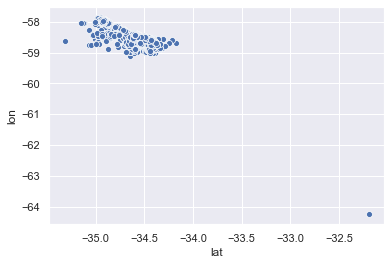

In [8]:
# una vez realizada la quita de datos faltantes, vemos que ocurre con los Outliers a partir de una muestra.
muestra = df_cluster.sample(n=10000,random_state=1)
sns.scatterplot(x = "lat", y = "lon",data=muestra)
plt.show()

In [9]:
# Limpieza de Outliers. 
# La limpieza de Outliers sera utilizando las graficas de dispercion ya que notamos que son pocos los puntos que "tiran"
# toda la grafica en su conjunto.
clean_out = df_cluster[df_cluster.lon < -60]
clean_out = df_cluster[df_cluster.lat < -34]
clean_out

,lat,lon,l3,l2
0,-34.605880,-58.384949,San Cristobal,Capital Federal
1,-34.624056,-58.412110,Boedo,Capital Federal
2,-34.593569,-58.427474,Palermo,Capital Federal
3,-34.581294,-58.436754,Palermo,Capital Federal
4,-34.914194,-57.938219,La Plata,Bs.As. G.B.A. Zona Sur
...,...,...,...,...
146655,-34.816348,-58.181963,Berazategui,Bs.As. G.B.A. Zona Sur
146656,-34.446459,-58.937810,Pilar,Bs.As. G.B.A. Zona Norte
146657,-34.444633,-58.981606,Pilar,Bs.As. G.B.A. Zona Norte
146658,-34.444830,-58.981796,Pilar,Bs.As. G.B.A. Zona Norte


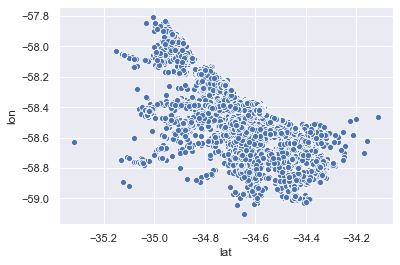

In [10]:
# Este Scatterplot nos servirá de guía para saber si una clusterización eficiente nos permite arribar a lo mismo.
sns.scatterplot(x = "lat", y = "lon",data=clean_out)
plt.show()

In [13]:
# Aplicamos una transformacion de las variables como no podia ser de otra manera en esta parte de aprendizaje no supervisado
pca1 = PCA(n_components= 2)

X = clean_out[["lat","lon"]]

X_new = pca1.fit_transform(X) 
X_new.shape

(136697, 2)

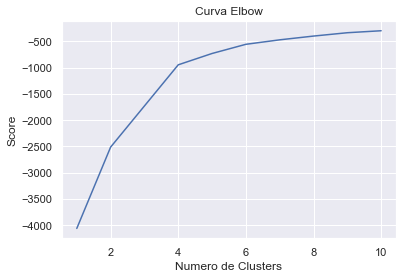

In [175]:
# Y ahora fundamentalmente, se probara que numero de cluster es el mejor a partir de ver la grafica "Curva Elbow".
rango_cluster = [1,2,4,5,6,7,8,9,10]

kmeans = [KMeans(n_clusters=i) for i in rango_cluster]

score = [kmeans[i].fit(X_new).score(X_new) for i in range(len(kmeans))]

plt.plot(rango_cluster,score)
plt.xlabel("Numero de Clusters")
plt.ylabel("Score")
plt.title("Curva Elbow")
plt.show()

In [14]:
# una vez definidos el mejor numero de cluster, a entrenar.
kmeans_l2 = KMeans(n_clusters=4, random_state=0)
train_kmeans = kmeans_l2.fit(X_new)

In [15]:
# se etiqueta los labels para su posterior analisis.
etiquetas_l2 = kmeans_l2.labels_
print(etiquetas_l2.shape)

(136697,)


In [16]:
# Y se definen los centros de los mismos dando las coordenadas de los mismos.
centros_l2 = kmeans_l2.cluster_centers_
print(centros_l2)

[[-0.27358173  0.0161036 ]
 [ 0.56299948  0.01847362]
 [ 0.00611978 -0.01436876]
 [ 0.15606144  0.09692407]]


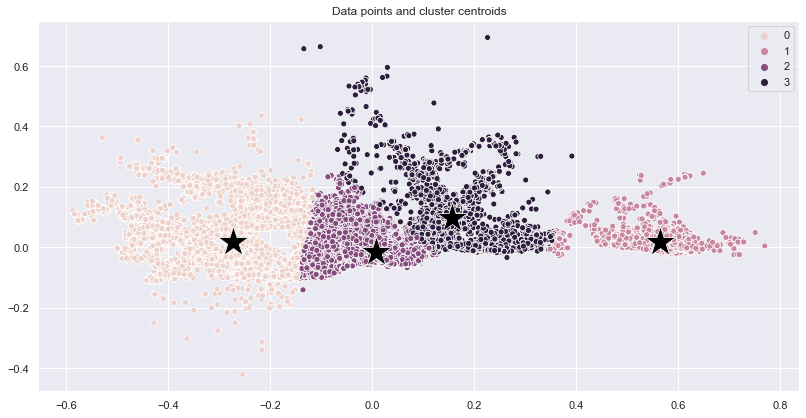

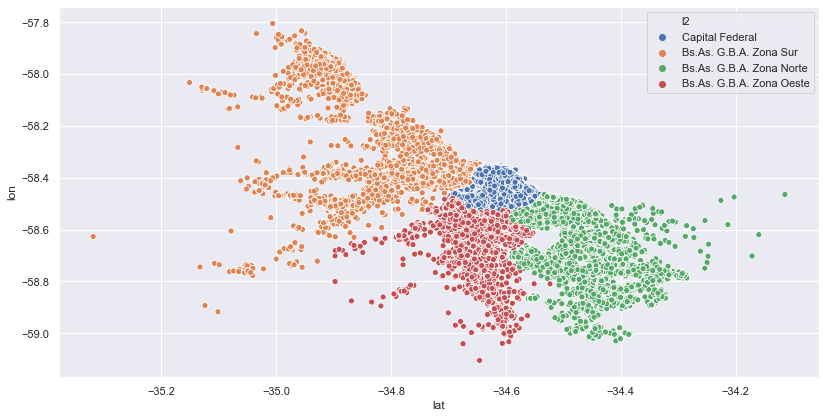

In [18]:
# Momento de graficar
# Aca se grafica por un lado la clusterizacion y por el otro un scatter donde se utiliza el "hue" para corroborar que el 
# modelo haya segmentado bien nuestros datos.
fig = plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.scatterplot(X_new[:, 0], X_new[:,-1], hue = etiquetas_l2)
sns.scatterplot(centros_l2[:, 0], centros_l2[:, 1],color='black', marker="*", s=1000)
plt.title('Data points and cluster centroids')


fig = plt.figure(figsize=(30,15))
plt.subplot(2,2,2)
sns.scatterplot(x = "lat", y = "lon",hue = "l2",data=clean_out)
plt.show()

In [19]:
# Ya por ultimo revisamos el Silhouette Score para saber que tan bien a clasificado nuestro clustering. La idea es que sea
# un valor bajo cercano a 0 para considerar que sea el mejor.
cluster_labels = kmeans_l2.predict(X_new)
silhouette =  silhouette_score(X_new, cluster_labels)

print("Para 4 Clusters el silhouette_score es :", silhouette)

Para 4 Clusters el silhouette_score es : 0.5838365757132508


In [ ]:
# Conclusión: Si comparamos visualmente, la idea principal era ver si los datos por distrito se agrupaban bien o presentaban
# alguna confusion en el agrupamiento. Notamos que los datos se dividen en forma seguida, una al lado de otra por lo tanto
# pueden llegar a tener una dificultad en diferenciar donde estan los datos por distritos. Esto puede ser que considere 
# distritos mas parecidos que otro como son CABA con Zona Oeste.
# Sin embargo los centroides estan distribuidos de forma similar al scatter plot donde estan los distritos.
# Finalizando, el silhouette-score nos dira si hizo un buen agrupamiento de puntos por separación entre cada cluster ya que
# analiza si cada nodo está más cerca de su comunidad que del resto por lo que mas cercano a 0, la separacion es buena.
# Sin embargo el valor del silhouette-score es muy elevado (0.58), por lo tanto concluimos que la separacion no fue muy buena
# y se destaca cuando lo vemos graficamente.